<h1><center>What's with that Image? Python!</center></h1>

<img src = "img/Meetup.jpg", width=600, height=600, class="center">

<h2><center>Dr. Sanjay Mishra, Ph.D.</center></h2>
<h3><center>Data Science Nashville Meetup</center></h3>
<h3><center>Jan 22, 2020</center></h3>

In [1]:
# libraries

import numpy as np
import os
# to imbed images
from IPython.display import Image

# Plotting modules and settings.
import matplotlib.pyplot as plt
import seaborn as sns
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
sns.set(style="white", palette=colors, rc={'axes.labelsize': 16})

%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

In [2]:
# scikit image libraries
import skimage #scikit-image
from skimage import filters, io, morphology, exposure
import skimage.data as data
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color

In [3]:
# lets concoct an image
# array of zeros
chess_board = np.zeros((9,9))

# change:
# odd rows: every 2nd element, from beginning (0 indexed) to ones

chess_board[::2, 1::2] = 1
chess_board

array([[0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0.]])

In [4]:
# change:
# even rows: every 2nd element, starting 1st to ones

chess_board[1::2, ::2] = 1
chess_board

array([[0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [1., 0., 1., 0., 1., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [1., 0., 1., 0., 1., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [1., 0., 1., 0., 1., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [1., 0., 1., 0., 1., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0.]])

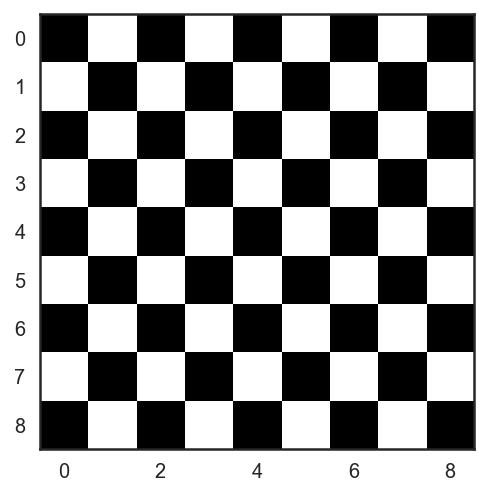

In [5]:
# plt.imshow(chess_board) # default color mzap is viridis
plt.imshow(chess_board, cmap='gray')
plt.show();

By convention of imshow, the default origin is located on the top left corner: 
* x-axis pointing downward and 
* y-axis pointing rightward. 

The unusual display axis is because an image is being displayed from the `ndarray`. 

While the array indexing is (row, column) -> (y, x) but the plotting of that array is by math convention: (x, y). 

Images are commonly displayed by "a printout of memory", using the `C convention`. Hence the column index is X, and incrementing the row index yields the next line down on the page, thereby corresponding to a decrease in the Y coordinate.

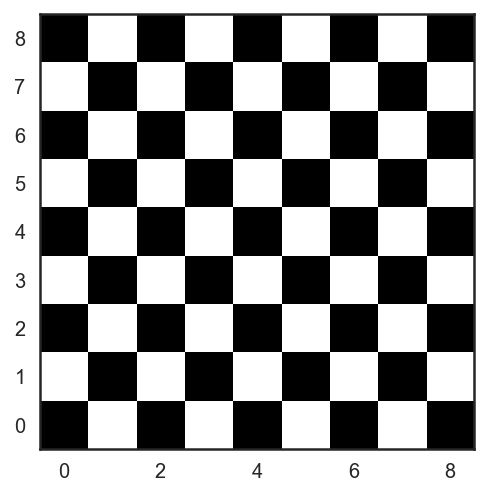

In [6]:
plt.imshow(chess_board, origin='lower', cmap='gray');

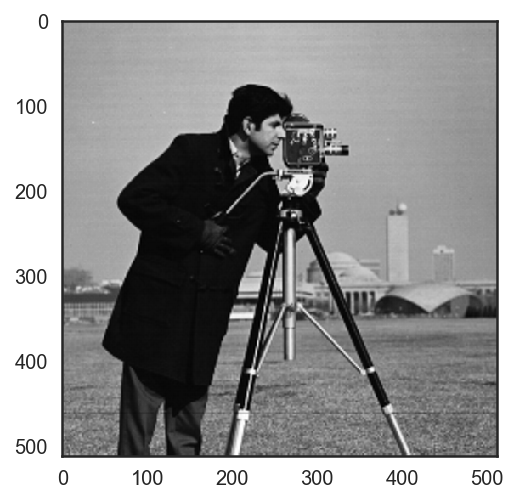

In [7]:
# use a built-in image
camera = data.camera()

# plt.imshow(camera)
plt.imshow(camera, cmap='gray')
plt.show();

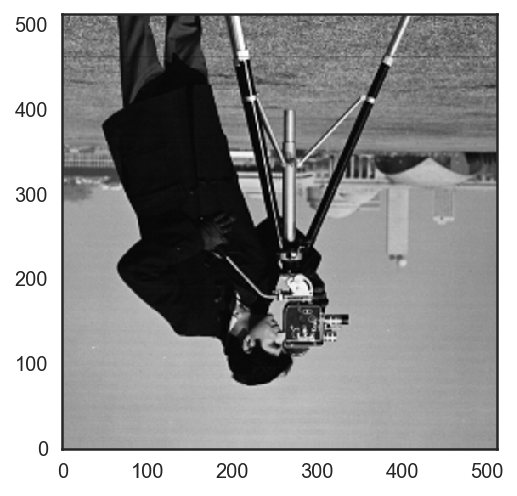

In [8]:
# if we used the array indexing convention here
plt.imshow(camera, origin='lower', cmap='gray')
plt.show();

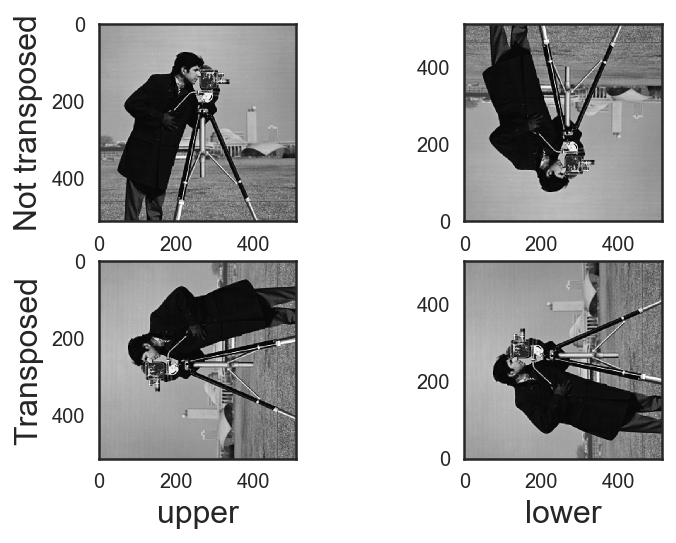

In [9]:
# plot all 4 possibilities of the array
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2)
ax1.imshow(camera, origin='upper', cmap='gray')
ax2.imshow(camera, origin='lower', cmap='gray')
# transpose the array
ax3.imshow(camera.T, origin='upper', cmap='gray')
ax4.imshow(camera.T, origin='lower', cmap='gray')
# set axis labels
ax3.set_xlabel('upper')
ax4.set_xlabel('lower')
ax1.set_ylabel('Not transposed')
ax3.set_ylabel('Transposed')

plt.show();

In [10]:
type(camera)

numpy.ndarray

In [11]:
print("data type: ", camera.dtype, "\n"
     "data shape: ", camera.shape)

data type:  uint8 
data shape:  (512, 512)


## Biology of color vision
<img src="img/opto_opener.png",width=600,height=600>
* __Rods__: vision at low light levels (scotopic vision), do not mediate color vision
* __Cones__: active at higher light levels (photopic vision), mediate color vision 
<br>Image source: Tony Graham/Getty images, Adapted by J. Hirshfeld; webvision.med.utah.edu

## Thrichromy
There are 3 kind of cones, and each contain a different form of protein called **photopsin** which absorb light in different parts of the spectrum:
<img src="img/chrmogram.jpg",width=600,height=600>
Image source: Biology by OpenStax CNX

## The luminosity function
Because of the spectral overlap, human cones are most sensitive to the yellow-green region of the spectrum:
<img src="img/spectralsensitivity_lum.png",width=600,height=600>
Image source: Colour and Vision Research Laboratories (CVRL), UCL.

## CIE color space
The International Commission on Illumination standardizes tristimulus coordinate system by setting $Y$ as luminance, and $xz$ plane to contain all possible chromaticities at that luminance. 
In this system, we try to recreate any given target wavelength, say 610nm from the primary lights: <br>
$$\lambda= 610nm\:{r(\lambda)} = 0.34756\:g(\lambda) = 0.04776\:b(\lambda) = -0.00038$$
<img src="img/CIE_xzY.png",width=600,height=600>
Image source: Chandler Abraham, Medium.

## Additive & Subtractive Color Mixing
We can create visible colors by utilizing some combination of the three primary colors, either by additive or subtractive processes. Additive processe creates color by adding primary colours, whereas subtractive processes selectively block white light. 

<table>
  <tr>
    <th>Additive</th>
    <th>Subtractive</th> 
   </tr>
  <tr>
    <td>RGB Space</td>
    <td>CMYK Space</td>
   </tr>
  <tr>
    <td><img src="img/colormgt_additive.png"</td>
    <td><img src="img/colormgt_subtractive.png"></td>
   </tr>
</table>
Image source: Cambridge in Colour

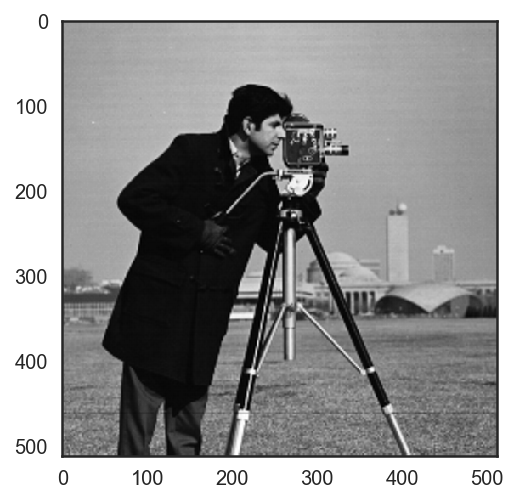

In [12]:
# input / output:
# from skimage import io
# import os
filename = os.path.join(skimage.data_dir, 'camera.png')
camera = io.imread(filename)
#plt.imshow(camera);
plt.imshow(camera, cmap='gray');

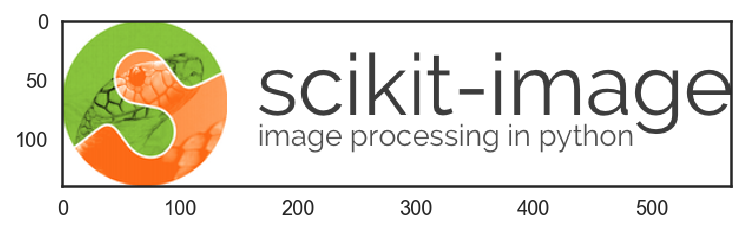

In [13]:
# file from a URL
logo = io.imread('http://scikit-image.org/_static/img/logo.png')
plt.imshow(logo)
plt.show()

In [14]:
# a digital image is data! It is a set of numbers with spatial positions.
camera

array([[156, 157, 160, ..., 152, 152, 152],
       [156, 157, 159, ..., 152, 152, 152],
       [158, 157, 156, ..., 152, 152, 152],
       ...,
       [121, 123, 126, ..., 121, 113, 111],
       [121, 123, 126, ..., 121, 113, 111],
       [121, 123, 126, ..., 121, 113, 111]], dtype=uint8)

In [15]:
print("shape of camera:", camera.shape)
print("shape of logo", logo.shape)

shape of camera: (512, 512)
shape of logo (140, 568, 3)


In the common RGB color model, each pixel holds intensity values for red, green, and blue. Since python stores images as `numpy.ndarrays` using each color in a 8 bit unsigned integer, which means that within the RGB convention, color values are restricted to the range 0 to 255 or $2^0 - (2^8 -1)$, where 0 is black and 255 is white. Because three color values need to be stored, color images require more than just a y and x dimension. <br>
Since a third dimension is added for color, to access a particular pixel's value for a RGB image, the convention used is: <br> 
image[ #y{coordinate} , #x{coordinate} , #red/green/blue ] or [hx[wx[r,g,b]]]

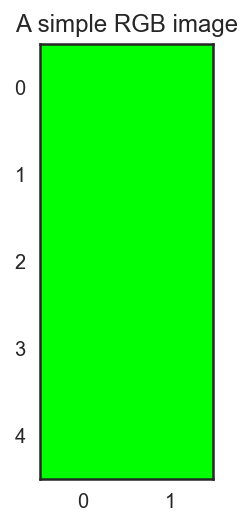

In [16]:
# Create an image (5 x 2 pixels) : height 5, width 4, rgb
rgb_image = np.zeros(shape=(5,2,3), dtype=np.uint8) # <- unsigned 8 bit int

rgb_image[:,:,0] = 0 # Set red value for all pixels
rgb_image[:,:,1] = 255   # Set green value for all pixels
rgb_image[:,:,2] = 0   # Set blue value for all pixels

plt.imshow(rgb_image)
plt.title("A simple RGB image")
plt.show();

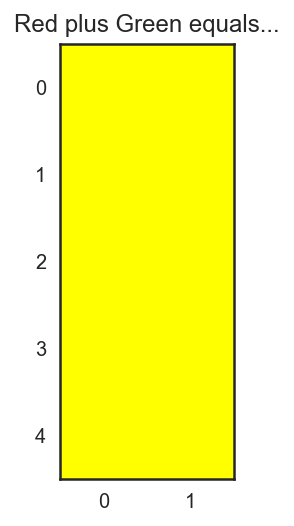

In [17]:
rgb_image[:,:,0] = 255 # Set red value for all pixels
rgb_image[:,:,1] = 255 # Set green value for all pixels
rgb_image[:,:,2] = 0   # Set blue value for all pixels

plt.imshow(rgb_image)
plt.title("Red plus Green equals...")
plt.show();

In [18]:
# manipulating grascale to RGB
chess_board.shape

(9, 9)

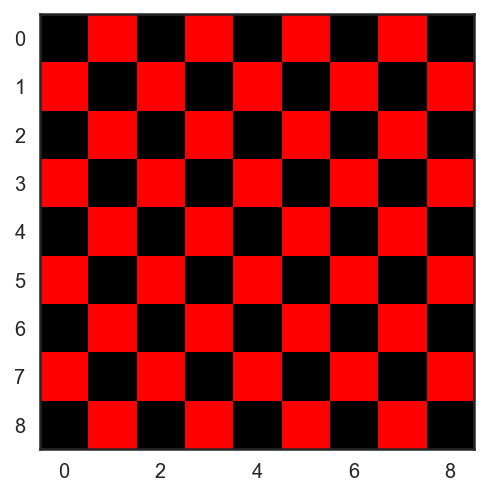

In [19]:
# confirmed that image is single channel
# broadcast the shape to an array
dim = np.zeros((chess_board.shape))
# dim = np.ones((chess_board.shape))
R = np.stack((chess_board, dim, dim), axis=2)

plt.imshow(R)
plt.show();

In [20]:
R.shape

(9, 9, 3)

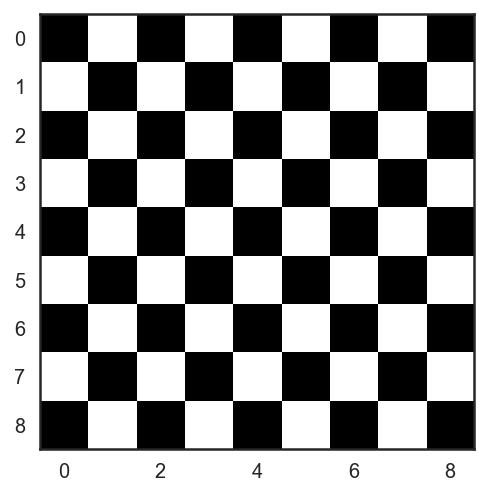

In [24]:
# But we got channel bias
# from http://www.socouldanyone.com/2013/03/converting-grayscale-to-rgb-with-numpy.html
R2 = chess_board.resize((chess_board.shape[0], chess_board.shape[1], 1))
R2 = np.repeat(chess_board, 3, 2)
plt.imshow(R2)
plt.show();

In [25]:
R2.shape

(9, 9, 3)

## Satellite Image Processing: 
#### Infrared light renders the familiar unfamiliar. 
<img src = "img/yellowstone_infrared_nps.jpg", width=300, height=300>
IR photograph shows the forests of Yellowstone National Park (National Park Service)

Satellite images are usually rendered into false color (or pseudo color) images, where the color rendering methods are used to display images in colors that were recorded in the visible or non-visible parts of the electromagnetic spectrum.

Each band of a multispectral image can be displayed one band at a time as a grayscale image, or as a combination of three bands at a time as a color composite image. 
<img src = "img/bands.jpg", width=600, height=600>
Image: Humboldt State University

(https://wifire.ucsd.edu/), http://webhelp.esri.com/arcgisdesktop/9.3/body.cfm?tocVisable=1&ID=3269&TopicName=Using%20the%20visualize%20elevation%20process

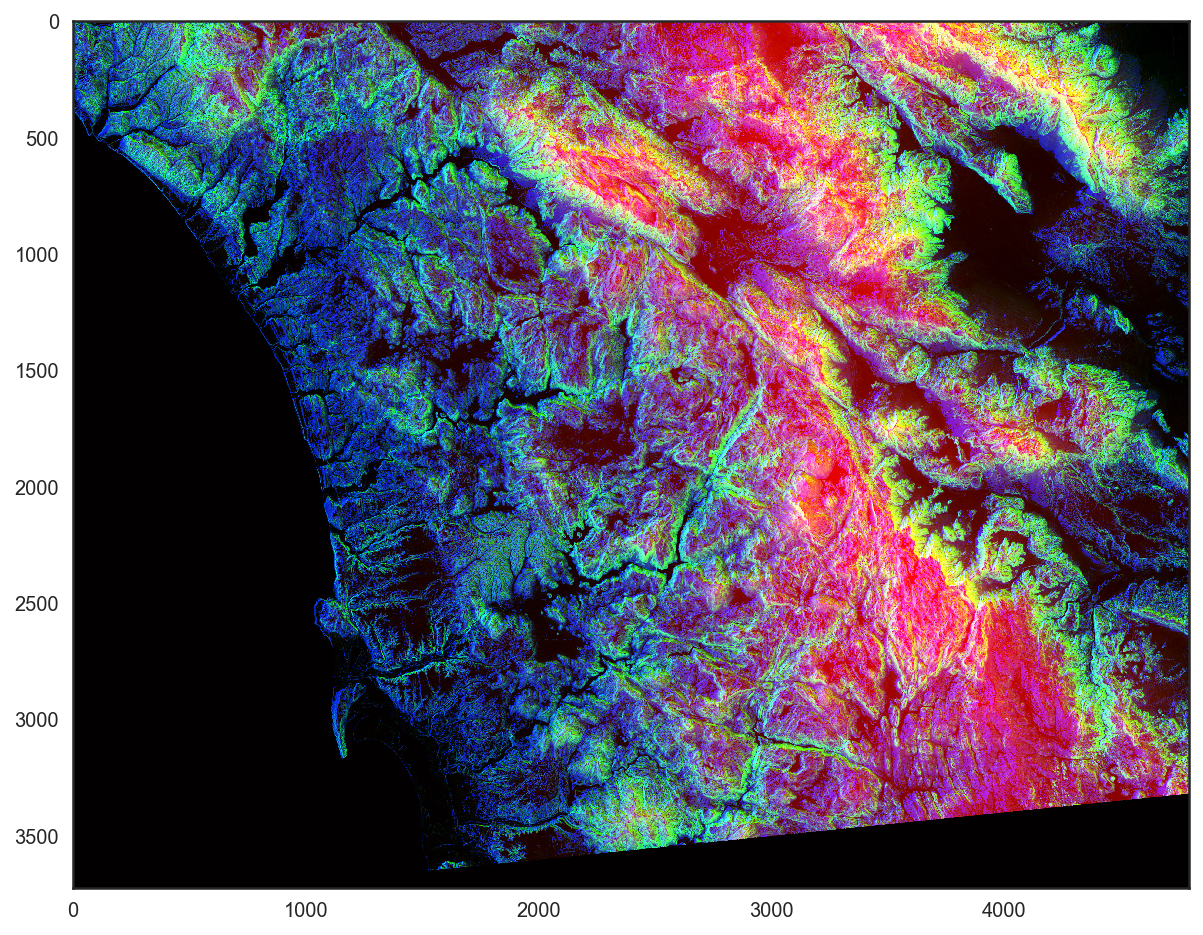

In [26]:
# load the image
terrain = io.imread('./data/sat_img.JPG')
plt.figure(figsize = (10,10))
plt.imshow(terrain)
plt.show();

In [27]:
print(f'Terrain\'s dimensions are: {terrain.shape}')
print(f'maximum  {terrain.max()} pixels')
print(f'mean {terrain.mean()} pixels')

Terrain's dimensions are: (3725, 4797, 3)
maximum  255 pixels
mean 75.8299354508947 pixels


* Red pixel: Altitude
* Blue pixel: Aspect
* Green pixel: Slope

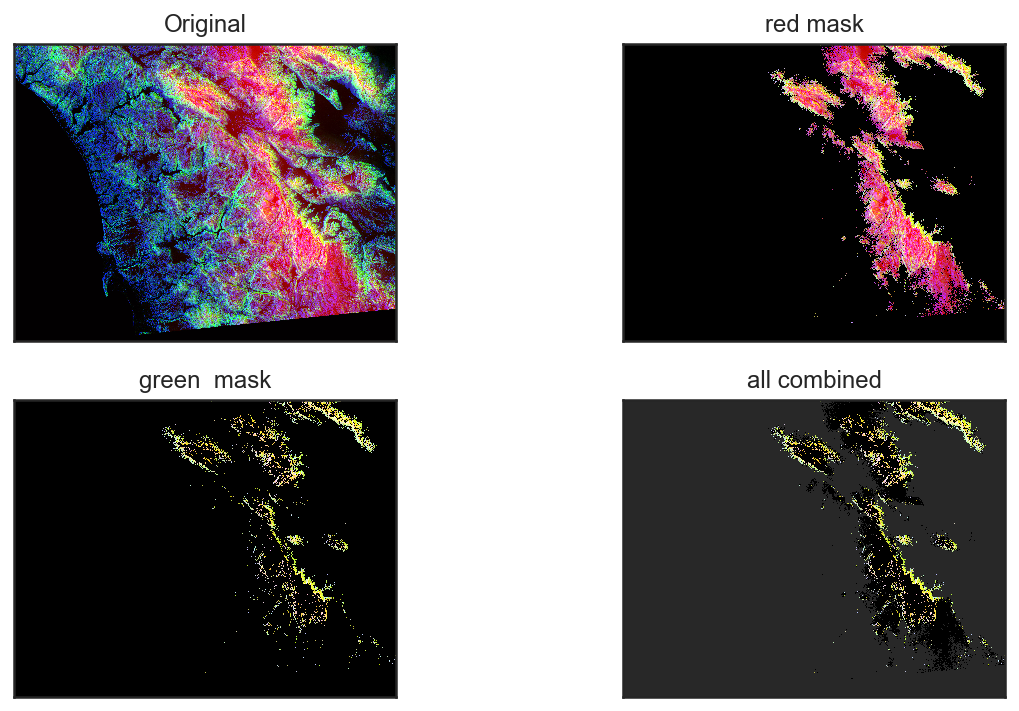

In [28]:
terrain = io.imread('./data/sat_img.JPG')
fig, axs = plt.subplots(2, 2, figsize=(10,6))

# original
axs[0, 0].imshow(terrain)
axs[0, 0].set_title('Original')

# Red Pixel values great than 180
red_mask = terrain[:, :, 0] < 180
terrain[red_mask] = 0
axs[0, 1].imshow(terrain)
axs[0, 1].set_title('red mask')

# Green Pixel values great than 180
green_mask = terrain[:, :, 1] < 180
terrain[green_mask] = 0
axs[1, 0].imshow(terrain)
axs[1, 0].set_title('green  mask')

# Composite mask using logical_and
final_mask = np.logical_and(red_mask, green_mask)
terrain[final_mask] = 40
axs[1, 1].imshow(terrain)
axs[1, 1].set_title('all combined')

for ax in axs.flat:
    ax.set(xlabel='', ylabel='')
    ax.set_xticklabels([])
    ax.set_yticklabels([])


plt.show();

__Splitting Layers__ <br>
Since each pixel of the image is represented by three integers, by pulling out the correct slice of the image array, we can split the image into separate color components.

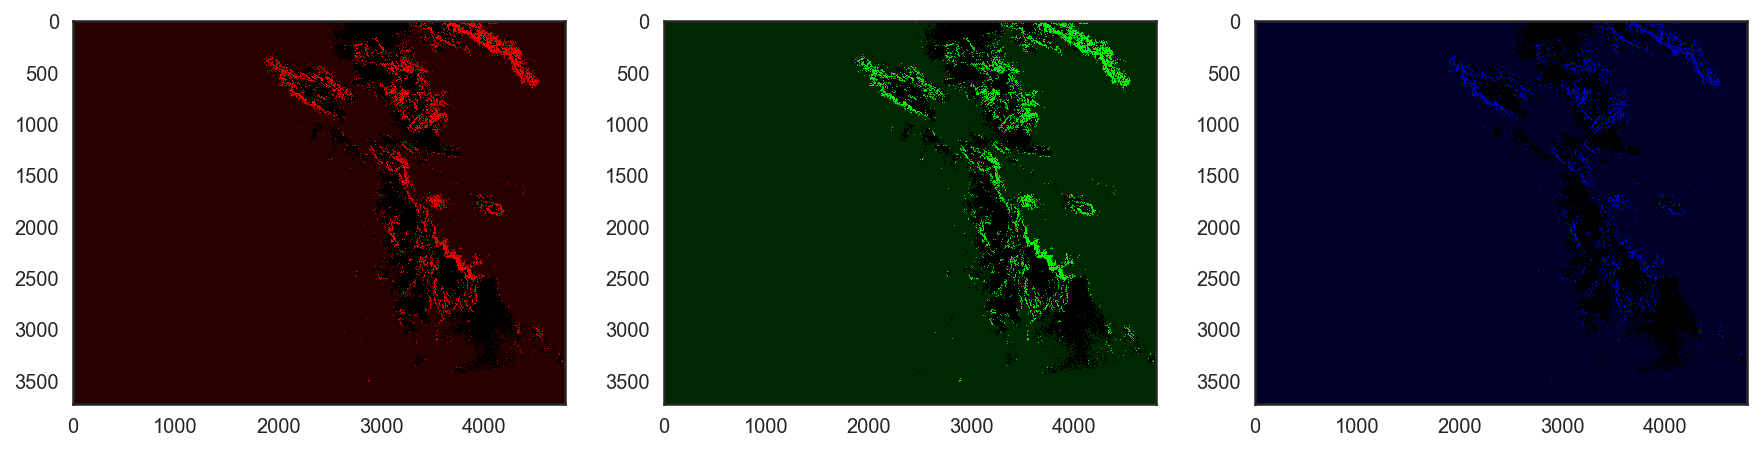

In [29]:
fig, ax = plt.subplots(nrows = 1, ncols=3, figsize=(15,5))

for c, ax in zip(range(3), ax):
    
    # create zero matrix
    split_img = np.zeros(terrain.shape, dtype="uint8") # 'dtype' by default: 'numpy.float64'
    
    # assing each channel 
    split_img[ :, :, c] = terrain[ :, :, c]
    
    # display each channel
    ax.imshow(split_img)

### segmentation
segmentation is the process by which we separate regions of an image according to their identity for analysis:
* what are "bacteria" and 
* what are "not bacteria". 

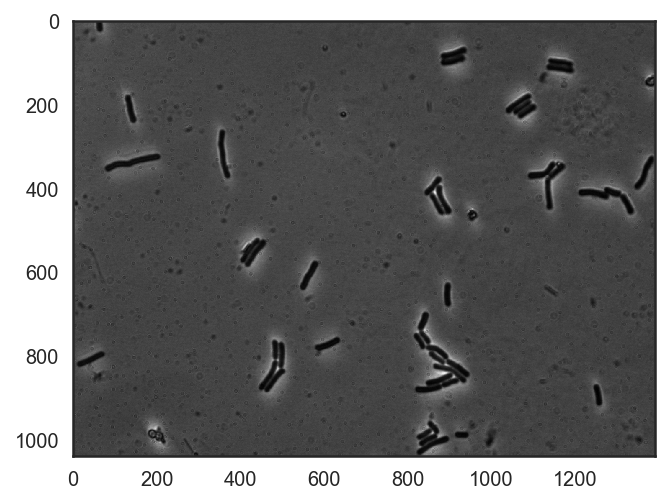

In [32]:
import mahotas as mh
phase = mh.imread('./data/phase.tif')
plt.imshow(phase, cmap='gray')
plt.show();

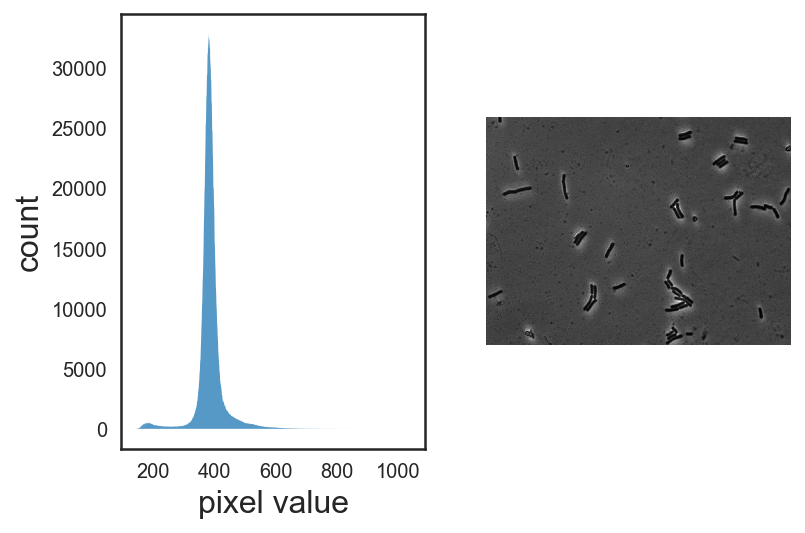

In [33]:
# Get the histogram data
hist_phase, bins_phase = skimage.exposure.histogram(phase)

# plot histogram
fig, ax = plt.subplots(1, 2)
ax[1].imshow(phase, cmap='gray')
ax[1].axis('off')

ax[0].set_xlabel('pixel value')
ax[0].set_ylabel('count')
_ = ax[0].fill_between(bins_phase, hist_phase, alpha=0.75)

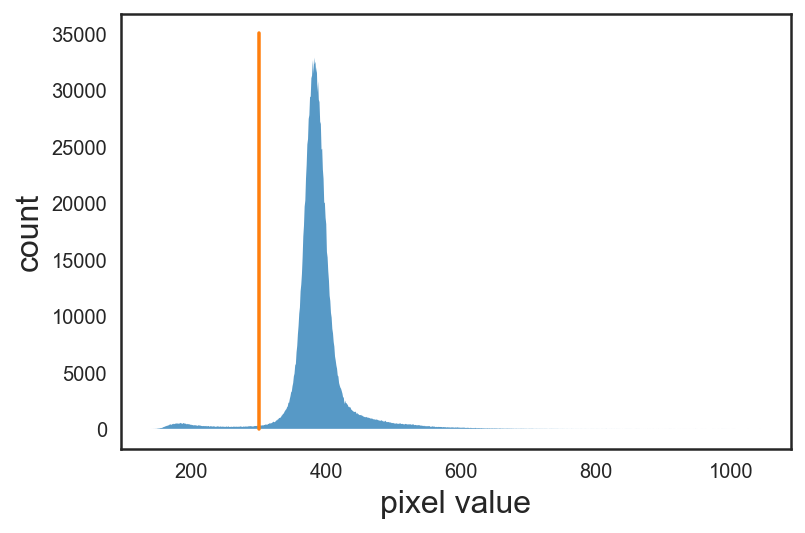

In [34]:
# guessing the threshold
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('pixel value')
ax.set_ylabel('count')
_ = ax.fill_between(bins_phase, hist_phase, alpha=0.75)
_ = ax.plot([300, 300], [0, 35000], linestyle='-', marker='None', color=colors[1])

### Thresholding
Thresholding is the process of taking pixels above or below a certain "threshold" or "cut-off" value. It is one of the simplest ways to segment an image.  <br>
For example, We can call every pixel with a value below 300 part of a bacterium and everything above not part of a bacterium.

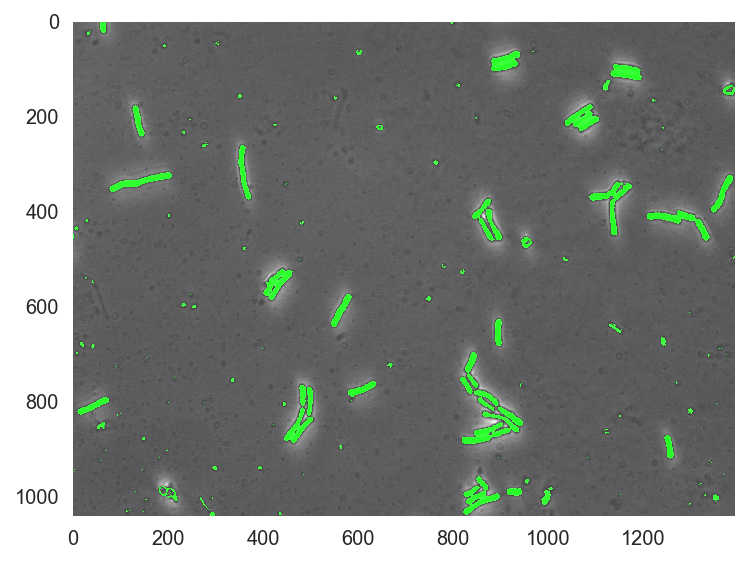

In [35]:
# manual thresholding
# Threshold value, as obtained by eye
thresh_phase = 300

# Generate thresholded image
im_phase_bw = phase < thresh_phase

# Build RGB image by stacking grayscale images
im_phase_rgb = np.dstack(3 * [phase / np.max(phase)])

# Saturate green channel wherever there are white pixels in thresh image
im_phase_rgb[im_phase_bw, 1] = 1.0

# Show the result
with sns.axes_style('dark'):
    skimage.io.imshow(im_phase_rgb)

C:\Users\mishr\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:75: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


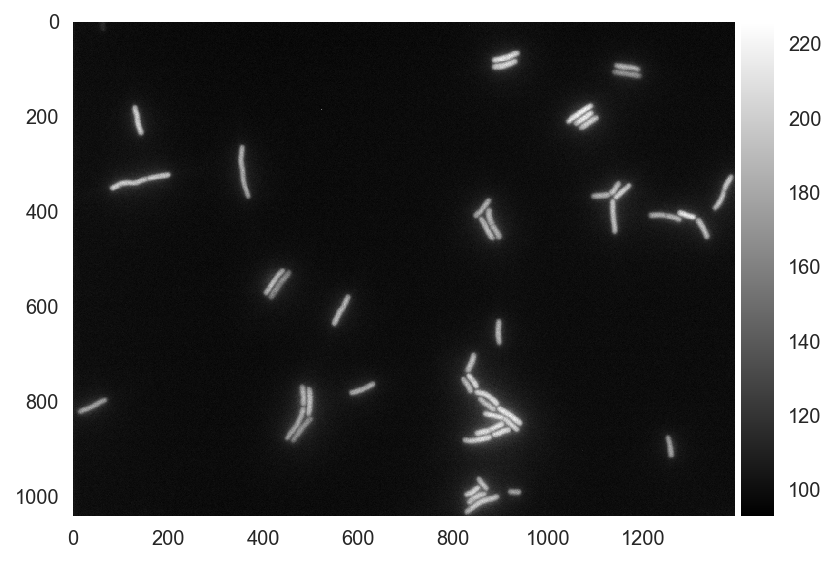

In [36]:
# use better quality image
im_cfp = skimage.io.imread('data/cfp.tif')

# Display the image
with sns.axes_style('dark'):
    skimage.io.imshow(im_cfp, cmap=plt.cm.gray)

C:\Users\mishr\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:75: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


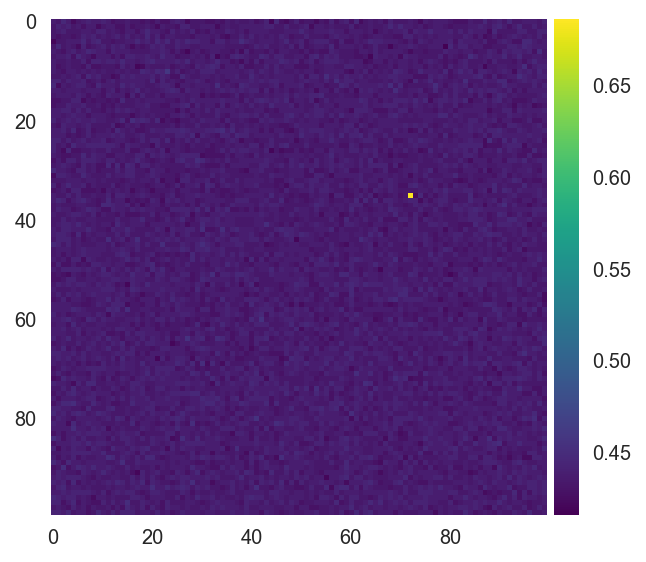

In [37]:
# Filtering noise:
with sns.axes_style('dark'):
    skimage.io.imshow(im_cfp[150:250,450:550] / im_cfp.max(), cmap=plt.cm.viridis)

We can remove the noise by using a **median filter**: <br> 
* We take a shape of pixels, called a structuring element, and 
* pass it over the image. 
* The value of the center pixel in the max is replaced by the median value of all pixels in the mask. 

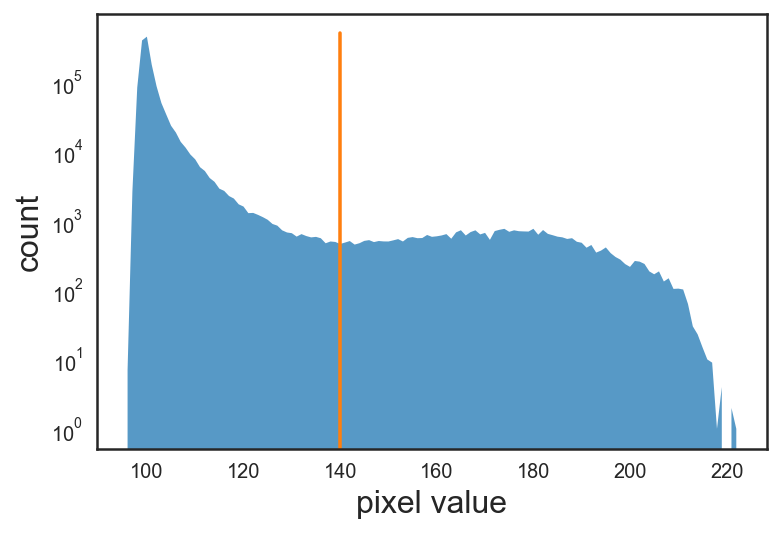

In [38]:
# Make the structuring element
selem = skimage.morphology.square(3)

# Perform the median filter
im_cfp_filt = skimage.filters.median(im_cfp, selem)

# Get the histogram data
hist_cfp, bins_cfp = skimage.exposure.histogram(im_cfp_filt)

# Use matplotlib to make a pretty plot of histogram data
fig, ax = plt.subplots(1, 1)
_ = ax.set_xlabel('pixel value')
_ = ax.set_ylabel('count')
_ = ax.fill_between(bins_cfp, hist_cfp, alpha=0.75)

# set y to log scale
ax.set_yscale('log')

# Plot eye-balled threshold
_ = ax.plot([140, 140], [0, 500000], color=colors[1])

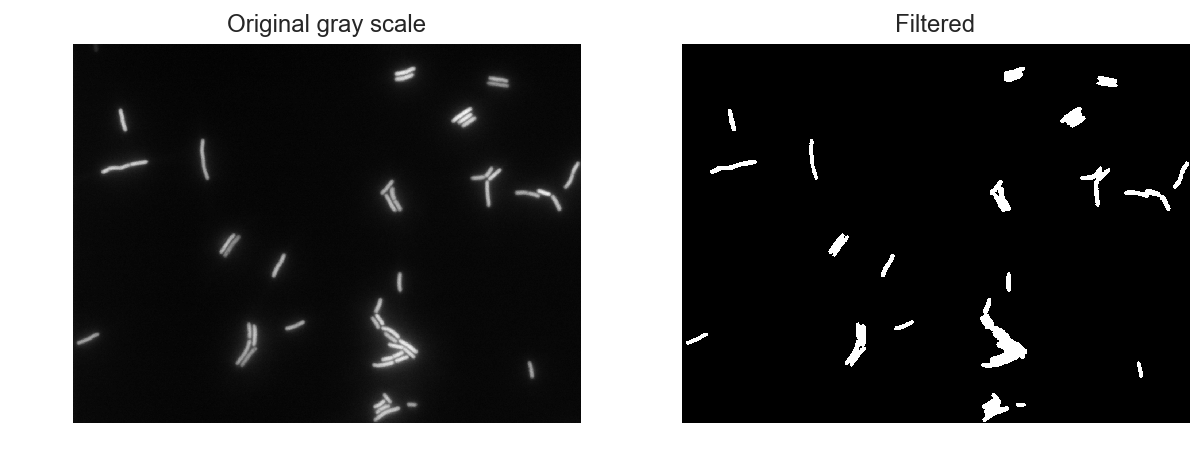

In [39]:
# Threshold value, as obtained by eye
thresh_cfp = 140

# Generate thresholded image
im_cfp_bw = im_cfp_filt > thresh_cfp

# Display phase and thresholded image
with sns.axes_style('dark'):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(im_cfp_filt, cmap=plt.cm.gray)
    ax[0].set_title("Original gray scale")
    ax[0].axis("off")
    ax[1].imshow(im_cfp_bw, cmap=plt.cm.gray)
    ax[1].set_title("Filtered")
    ax[1].axis("off")

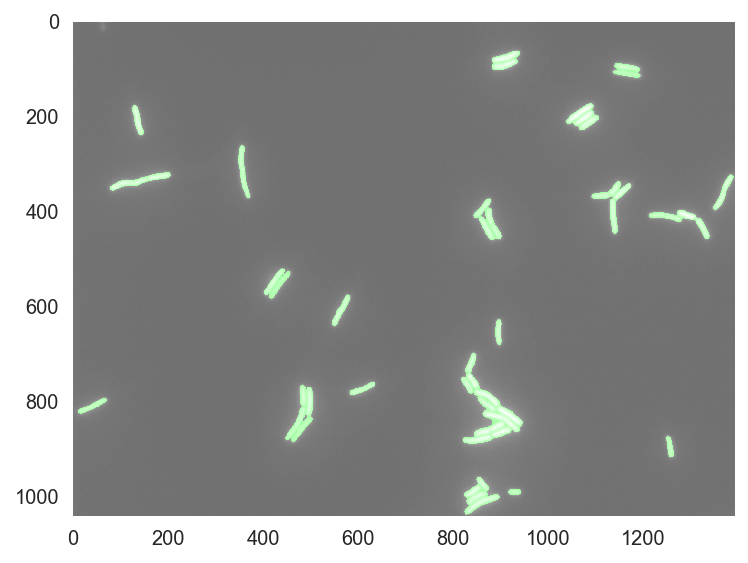

In [40]:
# Build RGB image by stacking grayscale images
im_cfp_rgb = np.dstack(3 * [im_cfp_filt / im_cfp_filt.max()])

# Saturate red channel wherever there are white pixels in thresh image
im_cfp_rgb[im_cfp_bw, 1] = 1.0

# Show the result
with sns.axes_style('dark'):
    skimage.io.imshow(im_cfp_rgb)

### Otsu's method for thresholding
Otsu's thresholding method iterates through all the possible threshold values and calculates a measure of spread for the pixel levels each side of the threshold, i.e. the pixels that either fall in foreground or background. By calculating Within Class Variance, and Between Class Variance, Otsu finds the threshold value where the sum of foreground and background spreads is at its minimum.
<img src = "img/otsuOrig.png"><img src ="img/otsuResult.png">
Image: [Dr. Andrew Greensted, The Labbook Pages](http://www.labbookpages.co.uk/software/imgProc/otsuThreshold.html)

In [41]:
# Compute Otsu thresholds for phase and cfp
thresh_phase_otsu = filters.threshold_otsu(phase)
thresh_cfp_otsu = filters.threshold_otsu(im_cfp_filt)

# Compare results to eyeballing it
print('B&W (Phase) by eye: ', thresh_phase,
      '| CFP by eye: ', thresh_cfp)
print('B&W (Phase) by Otsu:', thresh_phase_otsu,   
      '| CFP by Otsu:', thresh_cfp_otsu)

B&W (Phase) by eye:  300 | CFP by eye:  140
B&W (Phase) by Otsu: 437 | CFP by Otsu: 135


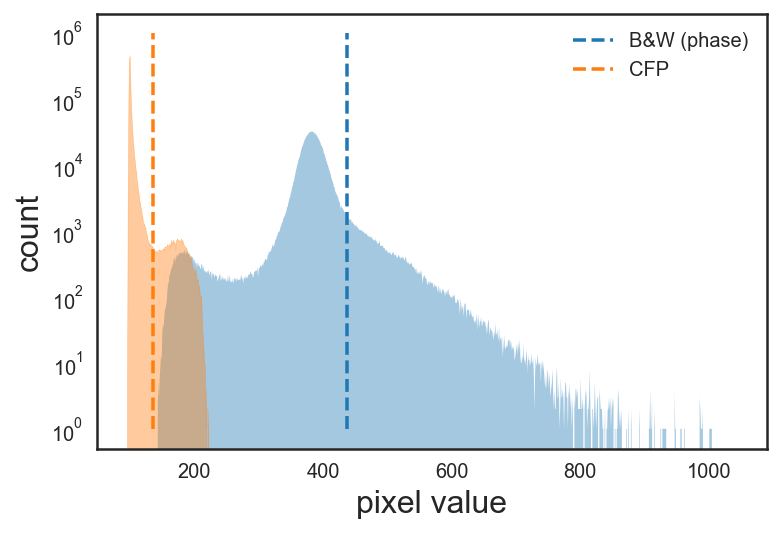

In [42]:
# Set up figure
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('pixel value')
ax.set_ylabel('count')
ax.set_yscale('log')

# Histograms with thresholds
_ = ax.fill_between(bins_phase, hist_phase, alpha=0.4)
_ = ax.fill_between(bins_cfp, hist_cfp, alpha=0.4, color=colors[1])

_ = ax.plot([thresh_phase_otsu, thresh_phase_otsu], [1, 1e6], '--', color=colors[0])
_ = ax.plot([thresh_cfp_otsu, thresh_cfp_otsu], [1, 1e6], '--', color=colors[1])
ax.legend(('B&W (phase)', 'CFP'), loc='upper right');

The Otsu method assumes a bimodal distribution of pixels. The B&W (phase) image has a long tail in the pixel distrution, which trips up the automated Otsu algorithm.

### Determining the bacterial area
Now that we have satisfactorily thresholded image, we can determine the total area taken up by bacteria by simply summing up the pixel values of the thresholded image!

In [43]:
# Compute bacterial area
bacterial_area_pix = (im_cfp_filt > thresh_cfp_otsu).sum()

# Print out the result
print('bacterial area =', bacterial_area_pix, 'pixels')

# converting total area that is bacterial in units of µm from the interpixel distance = 0.0636 µm
# Define interpixel distance
interpix_dist = 0.063 # microns

# Compute bacterial area
bacterial_area_micron = bacterial_area_pix * interpix_dist**2

# Print total area
print('bacterial area =', bacterial_area_micron, 'square microns')

bacterial area = 37945 pixels
bacterial area = 150.60370500000002 square microns


## What next?
### python libraries for computer vision:
* skimage
* mahotas
* OpenCV

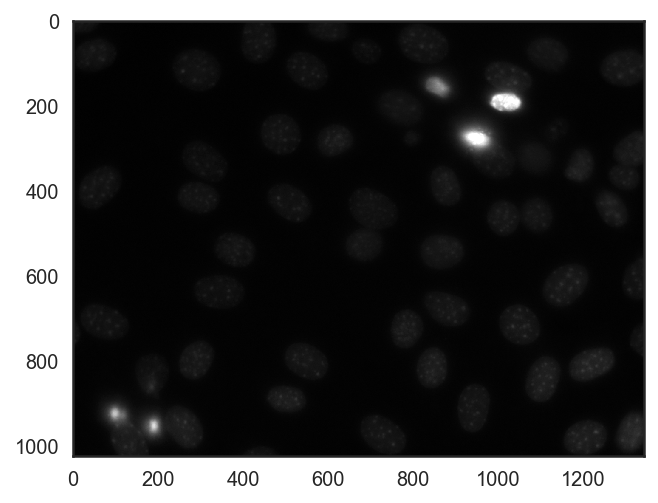

In [44]:
import mahotas as mh

f = mh.demos.nuclear_image()
f = f[:,:,0]
plt.imshow(f, cmap='gray')
plt.show()

### Filtering
filtering is the process by which each pixel in an image is assigned a new value depending upon the values of other pixels within some defined region (the pixel’s neighborhood). The methods to calculate neighborhood can be:
*  linear
  * mean
  * median
  * gradient
* nonlinear
  * rank
  * Gaussian

C:\Users\mishr\Anaconda3\lib\site-packages\mahotas\internal.py:112: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(A.dtype, np.float):


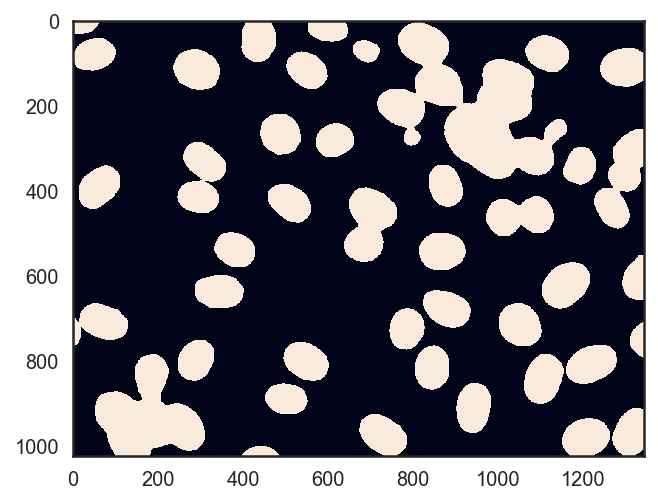

In [45]:
# Gaussian filtering
f = mh.gaussian_filter(f, 4)

# thresholding
f = (f> f.mean())

plt.imshow(f)
plt.show()

In [46]:
labeled, n_nuclei = mh.label(f)
print('found {} nuclei.'.format(n_nuclei))

found 42 nuclei.


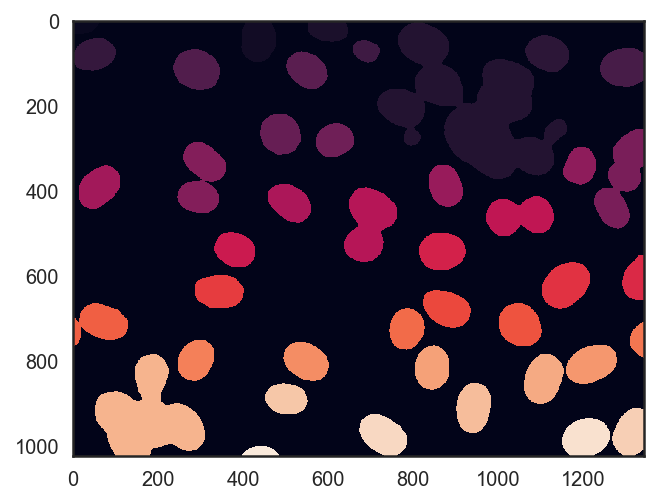

In [47]:
plt.imshow(labeled)
plt.show()

In [48]:
# measure sizes of the regions
sizes = mh.labeled.labeled_size(labeled)
sizes

array([981388,   1576,   6764,   4004,  73875,   6800,   6061,   2582,
         7905,   8220,   6364,   7289,   5657,  15323,  12653,   5286,
         6239,   7372,   6849,  14737,  11314,   6226,   7781,   4216,
         9266,   7409,   7502,   8103,   8476,   6351,   2031,   6500,
         7425,   8399,   6822,   8389,  35126,   7687,   5755,   6805,
         8074,   8083,   1572], dtype=uint32)

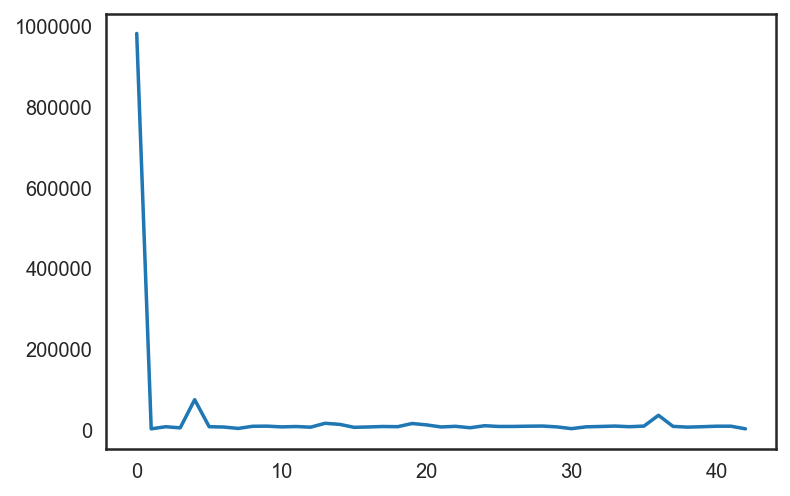

In [49]:
plt.plot(sizes);

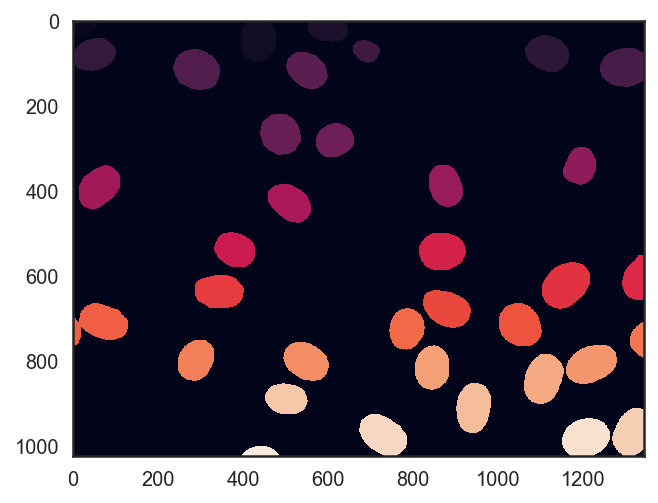

In [50]:
# filter out anything that is not a complete nucleus or that is a lump on nuclei by size
too_big = np.where(sizes > 10000)
labeled = mh.labeled.remove_regions(labeled, too_big)
plt.imshow(labeled)
plt.show()

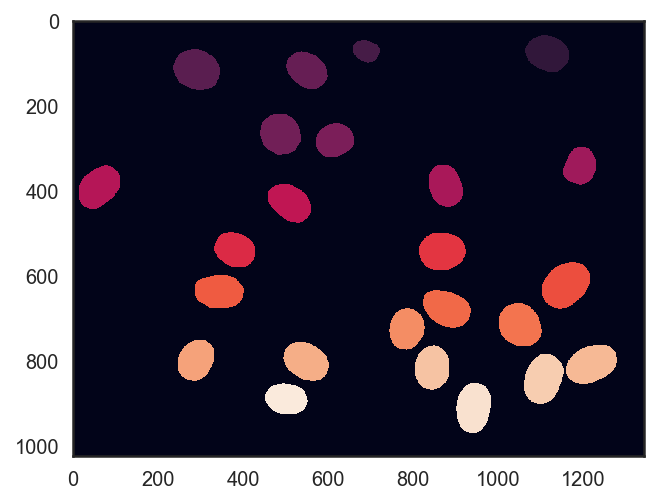

In [51]:
# remove the region touching the border
labeled = mh.labeled.remove_bordering(labeled)
plt.imshow(labeled)
plt.show()

In [52]:
relabeled, n_left = mh.labeled.relabel(labeled)
print('After filtering and relabeling, there are {} nuclei left.'.format(n_left))

After filtering and relabeling, there are 24 nuclei left.


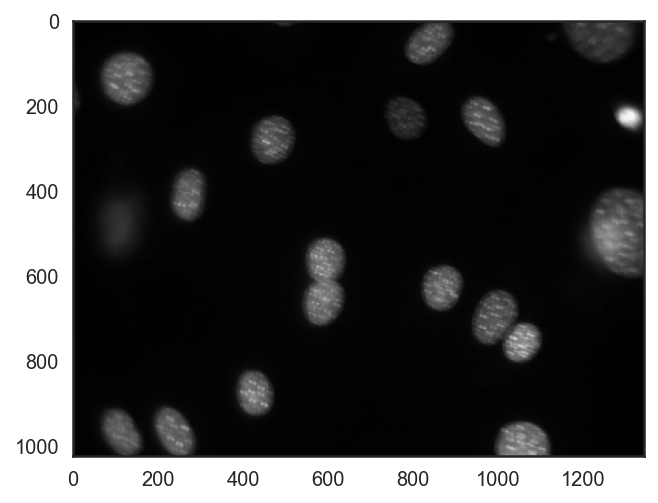

In [53]:
import mahotas as mh

# counting nuclei
dna = mh.imread('./data/dna.jpeg')
plt.imshow(dna, cmap='gray')
plt.show();

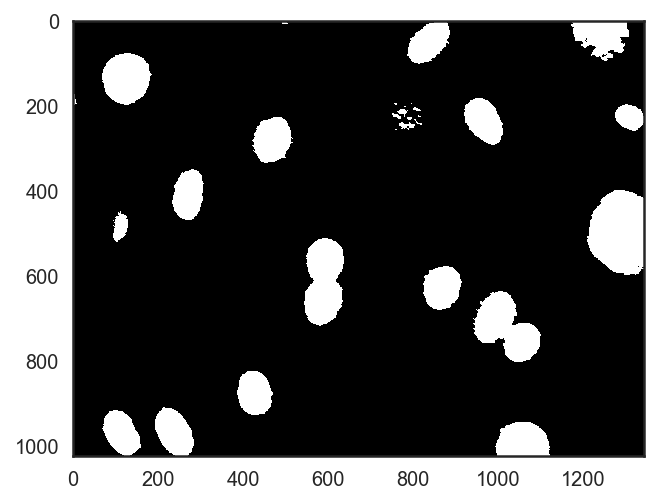

In [54]:
# OTSU thresholding
T = mh.thresholding.otsu(dna)
plt.imshow(dna > T, cmap='gray')
plt.show();

This isn’t too good. The image contains many small objects. There are a couple of ways to solve this. A simple one is to smooth the image a bit using a Gaussian filter.

C:\Users\mishr\Anaconda3\lib\site-packages\mahotas\internal.py:112: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(A.dtype, np.float):


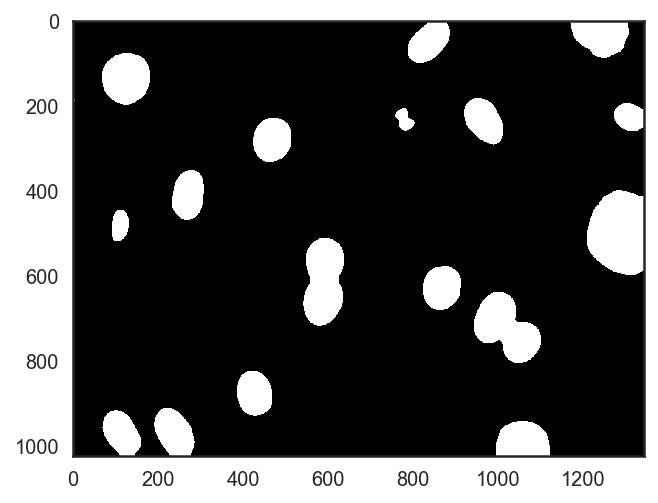

In [55]:
dnaf = mh.gaussian_filter(dna, 8) #  mh.gaussian_filter(image, the standard deviation of the filter)
T = mh.thresholding.otsu(dnaf.astype(np.uint8))
plt.imshow(dnaf > T, cmap='gray')
plt.show();

found 18 nuclei.


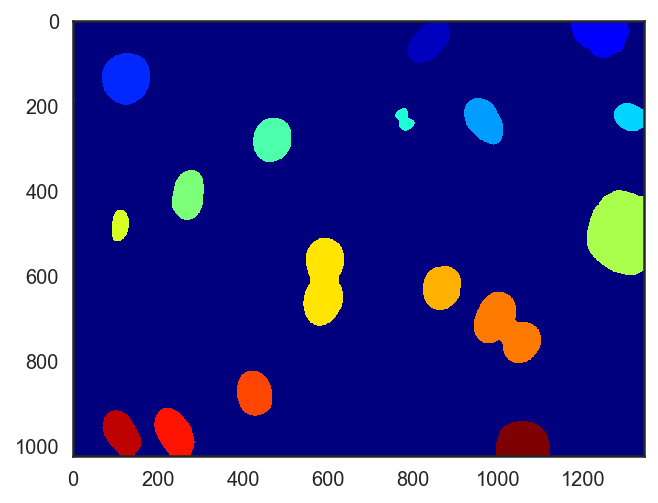

In [56]:
labeled,nr_objects = mh.label(dnaf > T)

print('found {} nuclei.'.format(nr_objects))

plt.imshow(labeled, cmap='jet')

# pylab.jet() just resets the colourmap to jet from greyscale map.
# pylab.jet()
plt.show();

The previous result was acceptable for a first pass, but there were still nuclei glued together.

A simple, traditional, idea is:

* smooth the image
* find regional maxima
* Use the regional maxima as seeds for watershed

C:\Users\mishr\Anaconda3\lib\site-packages\mahotas\internal.py:112: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(A.dtype, np.float):


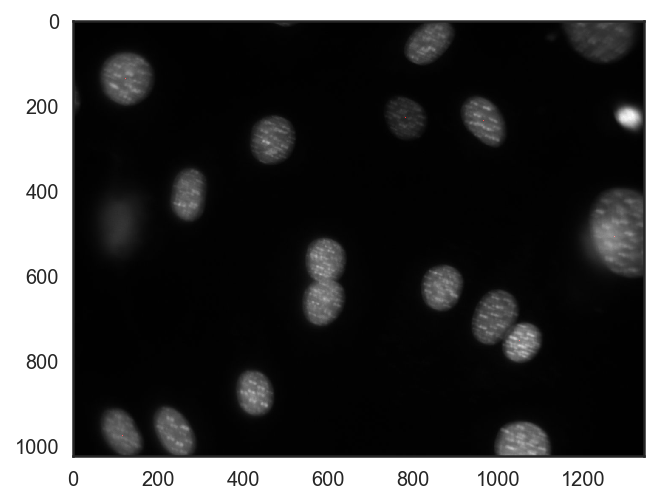

In [57]:
# with bigger sigma value
dnaf = mh.gaussian_filter(dna, 30)
rmax = mh.regmax(dnaf)
plt.imshow(mh.overlay(dna, rmax))
plt.show();

In [58]:
# recount the nuclei
seeds,nr_nuclei = mh.label(rmax)
print(nr_nuclei);

21
